## Regresion polinomial

La regresion polinomial es una alternativa a la regresion lineal en donde se consideran potencias mayores a uno de las caracteristicas; esto nos lleva a modelos mas complejos y que generan curva de aproximacion, cuyo grado de complejidad dependera del grado del polinomio aplicado o solicitado. Cabe anotar, que la regresion polinomial sigue siendo considerada una regresion lineal multiple debido a como aparecen los pesos $w$:

$$y=w_0+w_1x+w_2x^2+\dots+w_dx^d$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# Creando datos de prueba
# ============================================================
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [8]:
X

array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

In [32]:
# Agregar lementos cuadraticos a la matriz x
# ===========================================================
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [13]:
X_quad

array([[1.00000000e+00, 2.58000000e+02, 6.65640000e+04, 1.71735120e+07,
        4.43076610e+09, 1.14313765e+12, 2.94929514e+14, 7.60918147e+16,
        1.96316882e+19, 5.06497555e+21],
       [1.00000000e+00, 2.70000000e+02, 7.29000000e+04, 1.96830000e+07,
        5.31441000e+09, 1.43489070e+12, 3.87420489e+14, 1.04603532e+17,
        2.82429536e+19, 7.62559748e+21],
       [1.00000000e+00, 2.94000000e+02, 8.64360000e+04, 2.54121840e+07,
        7.47118210e+09, 2.19652754e+12, 6.45779096e+14, 1.89859054e+17,
        5.58185619e+19, 1.64106572e+22],
       [1.00000000e+00, 3.20000000e+02, 1.02400000e+05, 3.27680000e+07,
        1.04857600e+10, 3.35544320e+12, 1.07374182e+15, 3.43597384e+17,
        1.09951163e+20, 3.51843721e+22],
       [1.00000000e+00, 3.42000000e+02, 1.16964000e+05, 4.00016880e+07,
        1.36805773e+10, 4.67875744e+12, 1.60013504e+15, 5.47246185e+17,
        1.87158195e+20, 6.40081027e+22],
       [1.00000000e+00, 3.68000000e+02, 1.35424000e+05, 4.98360320e+07,
   

In [23]:
# Observando cambios es X
# ===========================================================

a = pd.DataFrame(X_quad)#, columns = ['w0', 'x', 'x^2'])
b = pd.DataFrame(X, columns = ['X'])
pd.concat([a, b], axis = 1)

,0,1,2,3,4,5,6,7,8,9,X
0,1.0,258.0,66564.0,17173512.0,4.430766e+09,1.143138e+12,2.949295e+14,7.609181e+16,1.963169e+19,5.064976e+21,258.0
1,1.0,270.0,72900.0,19683000.0,5.314410e+09,1.434891e+12,3.874205e+14,1.046035e+17,2.824295e+19,7.625597e+21,270.0
2,1.0,294.0,86436.0,25412184.0,7.471182e+09,2.196528e+12,6.457791e+14,1.898591e+17,5.581856e+19,1.641066e+22,294.0
3,1.0,320.0,102400.0,32768000.0,1.048576e+10,3.355443e+12,1.073742e+15,3.435974e+17,1.099512e+20,3.518437e+22,320.0
4,1.0,342.0,116964.0,40001688.0,1.368058e+10,4.678757e+12,1.600135e+15,5.472462e+17,1.871582e+20,6.400810e+22,342.0
5,1.0,368.0,135424.0,49836032.0,1.833966e+10,6.748995e+12,2.483630e+15,9.139759e+17,3.363431e+20,1.237743e+23,368.0
6,1.0,396.0,156816.0,62099136.0,2.459126e+10,9.738138e+12,3.856303e+15,1.527096e+18,6.047300e+20,2.394731e+23,396.0
7,1.0,446.0,198916.0,88716536.0,3.956758e+10,1.764714e+13,7.870624e+15,3.510298e+18,1.565593e+21,6.982545e+23,446.0
8,1.0,480.0,230400.0,110592000.0,5.308416e+10,2.548040e+13,1.223059e+16,5.870683e+18,2.817928e+21,1.352605e+24,480.0
9,1.0,586.0,343396.0,201230056.0,1.179208e+11,6.910160e+13,4.049354e+16,2.372921e+19,1.390532e+22,8.148516e+24,586.0


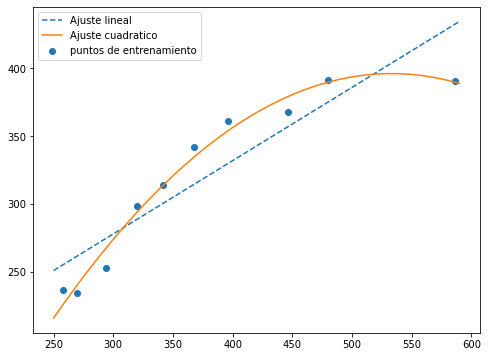

In [33]:
# Ajustando regresion lineal
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# Ajustando una regresion polinomial
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(X, y, label='puntos de entrenamiento')
ax.plot(X_fit, y_lin_fit, label='Ajuste lineal', linestyle='--')
ax.plot(X_fit, y_quad_fit, label='Ajuste cuadratico')
ax.legend(loc='upper left')

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print(f'MSE entrenamiento lineal: {mean_squared_error(y, y_lin_pred)}, Cuadratico: {mean_squared_error(y, y_quad_pred)}')
print(f'R^2 entrenamiento lineal: {r2_score(y, y_lin_pred)}, cuadratico: {r2_score(y, y_quad_pred)}')

MSE entrenamiento lineal: 569.7796663183207, Cuadratico: 61.330214517447715
R^2 entrenamiento lineal: 0.8317053837891232, cuadratico: 0.9818850241163604


<div class="burk">
EJERCICIOS</div><i class="fa fa-lightbulb-o "></i>

Utilice el archivo `housing.data.txt` que utilizamos durante las clases anteriores para modelar la relacion entra las variables `LSTAT` y `MEDV`; es conveniente que divida los datos en entrenamiento y prueba. Utilice tres regresiones: lineal, cuadratica y cubica; calcule los $R^2$ y grafique las relaciones. Procure que su grafica sea como la siguiente:

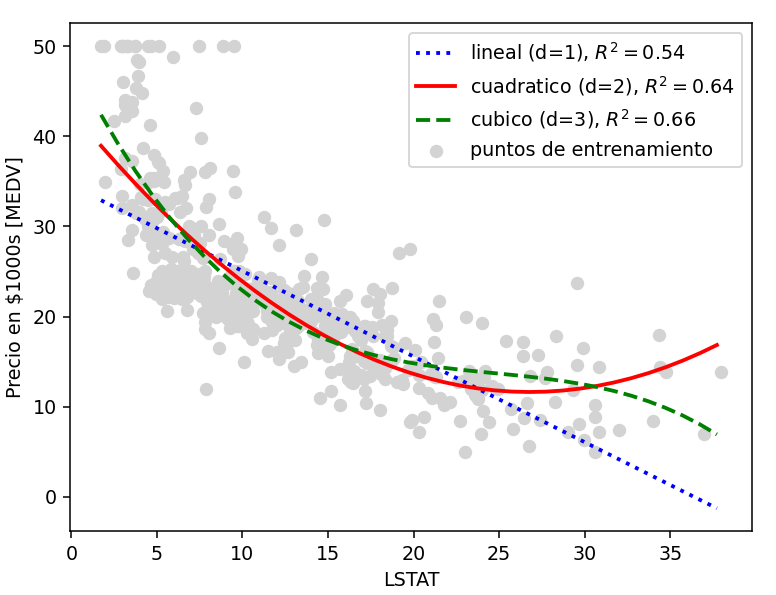

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('housing.data.txt', sep = '\s+', header = None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [11]:
df1=df.drop(columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
           'RAD','TAX','PTRATIO','B'])
df1.sort_values('LSTAT')
df1

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [26]:
X = df1.iloc[:, 0]
y = df1.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
X = df1.loc[:,'LSTAT'].values[:,np.newaxis]
y = df1.loc[:,'MEDV']
X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [63]:
# Agregar lementos cuadraticos a la matriz x
# ===========================================================
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
pr = LinearRegression()
cr = LinearRegression()
cubic = PolynomialFeatures(degree=3)
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)
X_cube = cubic.fit_transform(X_train)

In [64]:
# Observando cambios es X
# ===========================================================

a = pd.DataFrame(X_quad)#, columns = ['w0', 'x', 'x^2'])
b = pd.DataFrame(X, columns = ['X'])
pd.concat([a, b], axis = 1)

,0,1,2,X
0,1.0,6.48,41.9904,4.98
1,1.0,4.45,19.8025,9.14
2,1.0,27.71,767.8441,4.03
3,1.0,24.91,620.5081,2.94
4,1.0,8.05,64.8025,5.33
...,...,...,...,...
501,NaN,NaN,NaN,9.67
502,NaN,NaN,NaN,9.08
503,NaN,NaN,NaN,5.64
504,NaN,NaN,NaN,6.48


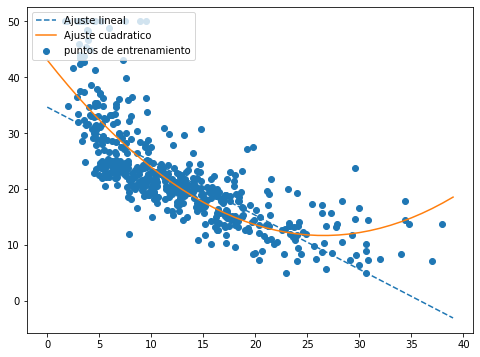

In [65]:
# Ajustando regresion lineal
lr.fit(X_train, y_train)
X_fit = np.arange(0, 40)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# Ajustando una regresion polinomial
pr.fit(X_quad, y_train)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

cr.fit(X_cube, y_train)
y_cube_fit = cr.predict(cubic.fit_transform(X_fit))


# plot results
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(df1['LSTAT'],df1['MEDV'], label='puntos de entrenamiento')
ax.plot(X_fit, y_lin_fit, label='Ajuste lineal', linestyle='--')
ax.plot(X_fit, y_quad_fit, label='Ajuste cuadratico')
ax.legend(loc='upper left')

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_lin_pred = lr.predict(X_train)
y_quad_pred = pr.predict(X_quad)
y_cubic_pred = cr.predict(X_cube)
print(f'MSE entrenamiento lineal: {mean_squared_error(y_train, y_lin_pred)}, Cuadratico: {mean_squared_error(y_train, y_quad_pred)},Cubico: {mean_squared_error(y_train, y_cubic_pred)}')
print(f'R^2 entrenamiento lineal: {r2_score(y_train, y_lin_pred)}, cuadratico: {r2_score(y_train, y_quad_pred)}')

MSE entrenamiento lineal: 38.519511866376654, Cuadratico: 31.416780250722567,Cubico: 30.350107442126728
R^2 entrenamiento lineal: 0.5426798820421261, cuadratico: 0.6270065493052539


## Relaciones no lineales mediante arboles de decision

Este tipo de regresion se puede entender como la suma de funciones lineales por partes. Visto de otra manera, se subdivide el espacio en regiones mas manejables sobre las que se hace las regresiones.

Una de sus ventajas es que no es necesario transformar las caracterisitcas de ninguna manera.

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return None

In [ ]:
from sklearn.tree import DecisionTreeRegressor

fig, ax = plt.subplots()
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)

In [ ]:
y_pred = tree.predict(X)
print(f'MSE entrenamiento lineal: {mean_squared_error(y, y_pred)}')
print(f'R^2 entrenamiento lineal: {r2_score(y, y_pred)}')

<div class="burk">
EJERCICIO</div><i class="fa fa-lightbulb-o "></i>

Aplique una regresion usando arboles de decision usando a las mismas caracteristicas del ejercicio anterior. Busque que no se genere sobreajuste en el conjunto de entrenamiento respecto al conjunto de test. Si no es posible evitar el sobreajuste con los hiperparametros de la regresion, considere usar extraccion de caracteristicas.

In [67]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return None

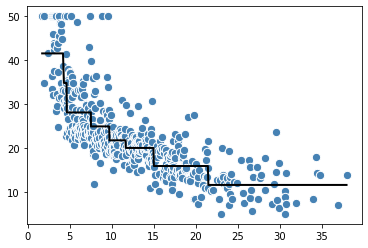

In [68]:
from sklearn.tree import DecisionTreeRegressor

fig, ax = plt.subplots()
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)

In [69]:
y_pred = tree.predict(X)
print(f'MSE entrenamiento lineal: {mean_squared_error(y, y_pred)}')
print(f'R^2 entrenamiento lineal: {r2_score(y, y_pred)}')


MSE entrenamiento lineal: 25.945454393057275
R^2 entrenamiento lineal: 0.6926606159233832


## Regresion con bosques aleatorios

Al igual que en la seccion de clasificacion, este metodo consiste en el manejo de multiples arboles de decision que crean el bosque aleatorio. Este modelo es menos propenso al sobreajuste, y es bastante util para trata problemas con los *outliers*. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X, y)

y_pred = forest.predict(X)

print(f'MSE entrenamiento: {mean_squared_error(y, y_pred)}')
print(f'R^2 entrenamiento: {r2_score(y, y_pred)}')

fig, ax = plt.subplots()
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], forest)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y_pred, y_pred - y, c='steelblue', edgecolor='white', marker='o', s=35, alpha=0.9, label='entrenamiento')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Residuos')
ax.legend(loc='best')
ax.hlines(y=0, xmin=240, xmax=400, lw=2, color='black', linestyle = '--')


<div class="burk">
EJERCICIO</div><i class="fa fa-lightbulb-o "></i>

Aplique una regresion usando bosques aleatorios a las mismas caracteristicas del ejercicio anterior. Busque que no se genere sobreajuste en el conjunto de entrenamiento respecto al conjunto de test. Si no es posible evitar el sobreajuste con los hiperparametros de la regresion, considere usar extraccion de caracteristicas.

MSE entrenamiento: 8.167416525292834
R^2 entrenamiento: 0.9030329381713073


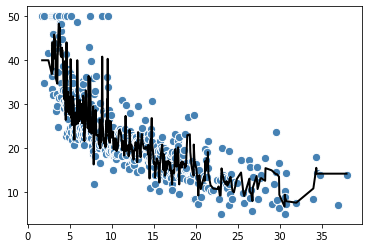

In [70]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_train)

print(f'MSE entrenamiento: {mean_squared_error(y_train, y_pred)}')
print(f'R^2 entrenamiento: {r2_score(y_train, y_pred)}')

fig, ax = plt.subplots()
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], forest)

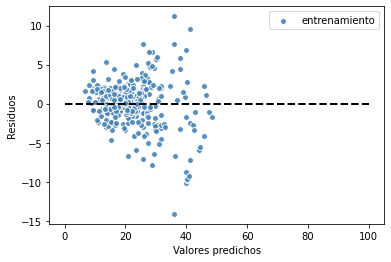

In [75]:
fig, ax = plt.subplots()

ax.scatter(y_pred, y_pred - y_train, c='steelblue', edgecolor='white', marker='o', s=35, alpha=0.9, label='entrenamiento')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Residuos')
ax.legend(loc='best')
ax.hlines(y=0, xmin=0, xmax=100, lw=2, color='black', linestyle = '--')


## Maquinas de soporte vectorial para regresion

Ya hemos tenido la oportunidad de trabajar con SVM para el caso de la clasificacion; ahora las usaremos para realizar regresiones en las cuales tendremos ligeros cambios, pero antes de mencionarlos, cabe anotar que las SVM son utilies para realizar regresiones lineales y no lineales.

El concepto basico es el mismo, generar una banda en torno a los datos tratando de contener la mayor cantidad posible. Las matematicas envueltas en el proceso no vienen al caso, por lo tanto no las trataremos en detalle, pero cabe anotar que es similar a lo visto en clasificacion. 

Es importante aclarar que es buena idea realizar escalamiento antes de...

In [ ]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf', C=100) # regresion no lineal
svm.fit(X, y) # No se realizo escalamiento pues es puramente ilustrativo
y_pred = svm.predict(X)
print(f'MSE entrenamiento: {mean_squared_error(y, y_pred)}')
print(f'R^2 entrenamiento: {r2_score(y, y_pred)}')

fig, ax = plt.subplots()
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], svm)

<div class="burk">
EJERCICIO</div><i class="fa fa-lightbulb-o "></i>

Aplique una regresion usando svm a las mismas caracteristicas del ejercicio anterior. Busque que no se genere sobreajuste en el conjunto de entrenamiento respecto al conjunto de test. Si no es posible evitar el sobreajuste con los hiperparametros de la regresion, considere usar extraccion de caracteristicas.

MSE entrenamiento: 27.89653757999136
R^2 entrenamiento: 0.6695488717284147


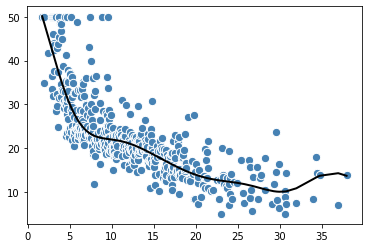

In [76]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf', C=100) # regresion no lineal
svm.fit(X, y) # No se realizo escalamiento pues es puramente ilustrativo
y_pred = svm.predict(X)
print(f'MSE entrenamiento: {mean_squared_error(y, y_pred)}')
print(f'R^2 entrenamiento: {r2_score(y, y_pred)}')

fig, ax = plt.subplots()
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], svm)

<div class="burk">
EJERCICIO</div><i class="fa fa-lightbulb-o "></i>

Utilice el archivo `machine.data` para realizar una regresion similar a la de la clase pasada. En este caso explore diferentes posibilidades de regresion polinomica, ajuste hiperparametros e imprima los rendimientos. No se podra graficar pues no es un problema bidimensional, pero podria intentar graficar los residuos de entrenamiento y test para evaluar la homocedasticidad. Pruebe otros algoritmos e intente un GridSearch en alguno de ellos (por ejemplo svm sobre C y gamma) para encontrar la mejor combinacion de hiperparametros. Si quiere ir un poco mas lejos, profundice su dominio en el algoritmo de regresion de los bosques aleatorios realizando extraccion de caracteristicas para reducir el sobreajuste. Sobre la validacion cruzada, es libre de elegir el numero de muestras a trabajar.

Sus resultados organicelos en google data studio con la intencion de exponer sus resultados, de tal forma que se observe una comparacion entre las regresiones usadas. Buena Suerte!!

In [83]:
df = pd.read_csv('machine.data', header=None)
df.columns = ['Vendor', 'Model Name', 'MYCT', 'MMIN', ' MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
df

,Vendor,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [93]:
df1 = df.drop(columns = ['ERP','Model Name','Vendor','PRP','CHMAX','CHMIN'])
df1.head()

,MYCT,MMIN,MMAX,CACH
0,125,256,6000,256
1,29,8000,32000,32
2,29,8000,32000,32
3,29,8000,32000,32
4,29,8000,16000,32


In [ ]:
X = df1.iloc[:,0:4]
y = df1[:,6:7]
X = pd.get_dummies(X, drop_first = True)
X = X.values

In [97]:
X = df1.iloc[:,0:3]
y = df1['CACH']
X = pd.get_dummies(X, drop_first = True)
X = X.values

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [99]:
# Agregar lementos cuadraticos a la matriz x
# ===========================================================
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
pr = LinearRegression()
cr = LinearRegression()
cubic = PolynomialFeatures(degree=3)
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)
X_cube = cubic.fit_transform(X_train)

In [104]:
X_cube = cubic.fit_transform(X_train)
cr.fit(X_cube, y_train)

LinearRegression()

In [106]:
y_cubo_pred_train = cr.predict(X_cube)

print(f'MSE entrenamiento Cubico: {mean_squared_error(y_train, y_cubo_pred_train)}')
print(f'R^2 entrenamiento Cubico: {r2_score(y_train, y_cubo_pred_train)}')

MSE entrenamiento Cubico: 1106.781057027916
R^2 entrenamiento Cubico: 0.3588252101027062


In [110]:
X_cube_test = cubic.fit_transform(X_test)
y_cubo_pred_test = cr.predict(X_cube_test)

print(f'MSE prueba Cubico: {mean_squared_error(y_test, y_cubo_pred_test)}')
print(f'R^2 prueba Cubico: {r2_score(y_test, y_cubo_pred_test)}')

MSE prueba Cubico: 1557.3165804680139
R^2 prueba Cubico: -0.075087072960905
